## Government Product Sales Dataset – Initial Exploration
In this notebook, we begin by exploring the Government Product Sales dataset (2013–2014), which includes sales information segmented by product, geography, pricing, and discounts. This initial step aims to load the dataset, inspect the first few rows, and establish familiarity with the data structure. The dataset will later be used for descriptive and visual analysis of sales trends across products and countries.

In [2]:
import os
import pandas as pd
import numpy as np 

# Example for Windows
gov_df = pd.read_csv(r"C:\Users\user\Downloads\Copy of International_Government_Product_Sales_Dataset_(2013–2014)(1).csv" )  # Note the "r" before the string


We display the first 10 rows of the dataset to inspect column names, data types, and any missing values. Key variables include Segment, Country, Product, Units Sold, Sale Price, COGS, Profit, and Date.

In [4]:

gov_df.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Germany,Carretera,NaN,1513.0,3,350,529550.0,0.0,529550.0,393380.0,136170.0,1-Dec-14,12,December,2014
1,Government,Germany,Paseo,NaN,1006.0,10,350,352100.0,0.0,352100.0,261560.0,90540.0,1-Jun-14,6,June,2014
2,Government,Canada,Paseo,NaN,1725.0,10,350,603750.0,0.0,603750.0,448500.0,155250.0,1-Nov-13,11,November,2013
3,Government,Germany,Paseo,NaN,1513.0,10,350,529550.0,0.0,529550.0,393380.0,136170.0,1-Dec-14,12,December,2014
4,Government,Germany,Velo,NaN,1006.0,120,350,352100.0,0.0,352100.0,261560.0,90540.0,1-Jun-14,6,June,2014
5,Government,France,VTT,NaN,1527.0,250,350,534450.0,0.0,534450.0,397020.0,137430.0,1-Sep-13,9,September,2013
6,Government,France,Amarilla,NaN,2750.0,260,350,962500.0,0.0,962500.0,715000.0,247500.0,1-Feb-14,2,February,2014
7,Government,Mexico,Carretera,Low,1210.0,3,350,423500.0,4235.0,419265.0,314600.0,104665.0,1-Mar-14,3,March,2014
8,Government,Mexico,Carretera,Low,1397.0,3,350,488950.0,4889.5,484060.5,363220.0,120840.5,1-Oct-14,10,October,2014
9,Government,France,Carretera,Low,2155.0,3,350,754250.0,7542.5,746707.5,560300.0,186407.5,1-Dec-14,12,December,2014


## Dataset Dimensions – Rows and Columns
To understand the overall size of the dataset, we use the .shape attribute. This is an essential first step in exploratory data analysis, as it tells us how many observations (rows) and features (columns) we are working with. Knowing the dataset’s dimensions helps us plan data cleaning, transformation, and visualization strategies appropriately.

In [6]:
gov_df.shape

(700, 16)

The dataset contains 700 rows and 16 columns.

Each row likely represents a unique record of a government product sale (e.g., by country, product, or date).

The 16 columns include key attributes such as product information, financial metrics (e.g., sale price, profit), and time indicators.

In [8]:
gov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        647 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    int64  
 6   Sale Price           700 non-null    int64  
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9    Sales               700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

In [9]:
gov_df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


## Column Names – Understanding Dataset Structure
To better understand the content and structure of our dataset, we examine its column names using the **.columns** attribute. This reveals what types of variables we’re working with — including identifiers, product and financial details, and temporal information.

In [11]:
gov_df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [12]:
np.unique(gov_df.Segment.to_list())

array(['Channel Partners', 'Enterprise', 'Government', 'Midmarket',
       'Small Business'], dtype='<U16')

In [13]:
np.unique(gov_df.Country.to_list())

array(['Canada', 'France', 'Germany', 'Mexico',
       'United States of America'], dtype='<U24')

In [14]:
np.unique(gov_df.Product.to_list())

array(['Amarilla', 'Carretera', 'Montana', 'Paseo', 'VTT', 'Velo'],
      dtype='<U9')

In [15]:
np.unique(gov_df['Discount Band'].to_list())

array(['High', 'Low', 'Medium', 'nan'], dtype='<U32')

## Checking for Missing Values
Before proceeding with analysis, it’s crucial to identify any missing data. This helps determine whether imputation, exclusion, or transformation is needed. Using .isnull().sum() allows us to detect how many null (NaN) values exist in each column of the dataset.

In [17]:
gov_df.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

All **columns** except Discount Band are fully complete, meaning they have zero missing values.

The Discount Band column has 53 missing values, which accounts for about 7.6% of the total dataset (53 out of 700).

## Handling Missing Values in the Discount Band Column
After identifying missing values in the Discount Band column, we now resolve this issue to ensure smooth analysis. Rather than dropping rows or estimating values, we use a simple yet effective strategy: filling all missing entries with the placeholder 'Unknown'. This preserves data integrity while clearly marking unclassified discount bands.

We then re-check for any remaining missing values in the dataset.

In [20]:
gov_df['Discount Band'] = gov_df['Discount Band'].fillna('Unknown')

In [21]:
gov_df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

The Discount Band column is now fully populated — all 53 previously missing values have been replaced with the label 'Unknown'.

The dataset is now completely free of null values across all 16 columns.

Checking for Duplicate Records
An important part of data cleaning is verifying that there are no duplicate rows, which can distort statistics and visualizations. Using **.duplicated().sum()**, we check how many rows in the dataset are exact copies of others.


In [24]:
gov_df.duplicated().sum()

0

The dataset contains zero duplicated rows, meaning each record is unique.

This indicates that the data source is reliable and hasn’t introduced repeated entries during collection or consolidation.

In [26]:
gov_df.shape

(700, 16)

In [27]:
gov_df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [28]:
categorical_cols = gov_df.columns[gov_df.dtypes == object]
for col in categorical_cols:
    gov_df.loc[:, col] = gov_df[col].str.strip().str.lower()

In [29]:
gov_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,government,germany,carretera,unknown,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,1-dec-14,12,december,2014
1,government,germany,paseo,unknown,1006.0,10,350,352100.0,0.00,352100.00,261560.0,90540.00,1-jun-14,6,june,2014
2,government,canada,paseo,unknown,1725.0,10,350,603750.0,0.00,603750.00,448500.0,155250.00,1-nov-13,11,november,2013
3,government,germany,paseo,unknown,1513.0,10,350,529550.0,0.00,529550.00,393380.0,136170.00,1-dec-14,12,december,2014
4,government,germany,velo,unknown,1006.0,120,350,352100.0,0.00,352100.00,261560.0,90540.00,1-jun-14,6,june,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,midmarket,canada,paseo,high,1614.0,10,15,24210.0,3631.50,20578.50,16140.0,4438.50,1-apr-14,4,april,2014
696,midmarket,canada,paseo,high,2559.0,10,15,38385.0,5757.75,32627.25,25590.0,7037.25,1-aug-14,8,august,2014
697,enterprise,germany,paseo,high,1085.0,10,125,135625.0,20343.75,115281.25,130200.0,-14918.75,1-oct-14,10,october,2014
698,midmarket,germany,paseo,high,1175.0,10,15,17625.0,2643.75,14981.25,11750.0,3231.25,1-oct-14,10,october,2014


In [30]:
gov_df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [31]:
gov_df.shape

(700, 16)

In [32]:
#gov_df.to_csv("C:/Users/user/Desktop/tekher/looker studio/CSV/gov_cleaned.csv", index=False)

In [33]:
##gov_df1 = pd.read_csv(r"C:\Users\user\Desktop\tekher\looker studio\CSV\gov_cleaned.csv")
##gov_df1

In [35]:
gov_df.describe(include='object')

,Segment,Country,Product,Discount Band,Date,Month Name
count,700,700,700,700,700,700
unique,5,5,6,4,16,12
top,government,germany,paseo,high,1-dec-14,october
freq,300,140,202,245,70,140


In [39]:
gov_df['Segment'].value_counts(normalize=True)

Segment
government          0.428571
midmarket           0.142857
channel partners    0.142857
enterprise          0.142857
small business      0.142857
Name: proportion, dtype: float64

In [41]:
gov_df['Country'].value_counts(normalize=True)

Country
germany                     0.2
canada                      0.2
france                      0.2
mexico                      0.2
united states of america    0.2
Name: proportion, dtype: float64

In [43]:
gov_df['Product'].value_counts(normalize=True)

Product
paseo        0.288571
velo         0.155714
vtt          0.155714
amarilla     0.134286
carretera    0.132857
montana      0.132857
Name: proportion, dtype: float64

In [45]:
gov_df_profit = gov_df.groupby('Profit').size().reset_index(name='total')
gov_df_profit

,Profit,total
0,-40617.50,1
1,-38046.25,1
2,-35550.00,1
3,-35262.50,1
4,-33522.50,1
...,...,...
552,236716.00,2
553,238791.00,2
554,246178.00,2
555,247500.00,1


In [47]:
import plotly.express as px
import matplotlib.pyplot as plt

In [48]:
print(gov_df.columns.tolist())

['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [49]:
gov_df.columns = gov_df.columns.str.strip()  # remove spaces


In [53]:
gov_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,government,germany,carretera,unknown,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,1-dec-14,12,december,2014
1,government,germany,paseo,unknown,1006.0,10,350,352100.0,0.00,352100.00,261560.0,90540.00,1-jun-14,6,june,2014
2,government,canada,paseo,unknown,1725.0,10,350,603750.0,0.00,603750.00,448500.0,155250.00,1-nov-13,11,november,2013
3,government,germany,paseo,unknown,1513.0,10,350,529550.0,0.00,529550.00,393380.0,136170.00,1-dec-14,12,december,2014
4,government,germany,velo,unknown,1006.0,120,350,352100.0,0.00,352100.00,261560.0,90540.00,1-jun-14,6,june,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,midmarket,canada,paseo,high,1614.0,10,15,24210.0,3631.50,20578.50,16140.0,4438.50,1-apr-14,4,april,2014
696,midmarket,canada,paseo,high,2559.0,10,15,38385.0,5757.75,32627.25,25590.0,7037.25,1-aug-14,8,august,2014
697,enterprise,germany,paseo,high,1085.0,10,125,135625.0,20343.75,115281.25,130200.0,-14918.75,1-oct-14,10,october,2014
698,midmarket,germany,paseo,high,1175.0,10,15,17625.0,2643.75,14981.25,11750.0,3231.25,1-oct-14,10,october,2014


## Time Series Analysis – Sales and Profit Over Time
To explore trends and seasonality in financial performance, we generate a time series line chart showing the evolution of Sales and Profit over time. By grouping data by the Date field and summing the Sales and Profit for each date, we can visualize monthly fluctuations, identify seasonal patterns, and detect any potential surges or drops in performance.

C:\Users\user\AppData\Local\Temp\ipykernel_16224\1259637310.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gov_df['Date'] = pd.to_datetime(gov_df['Date'])


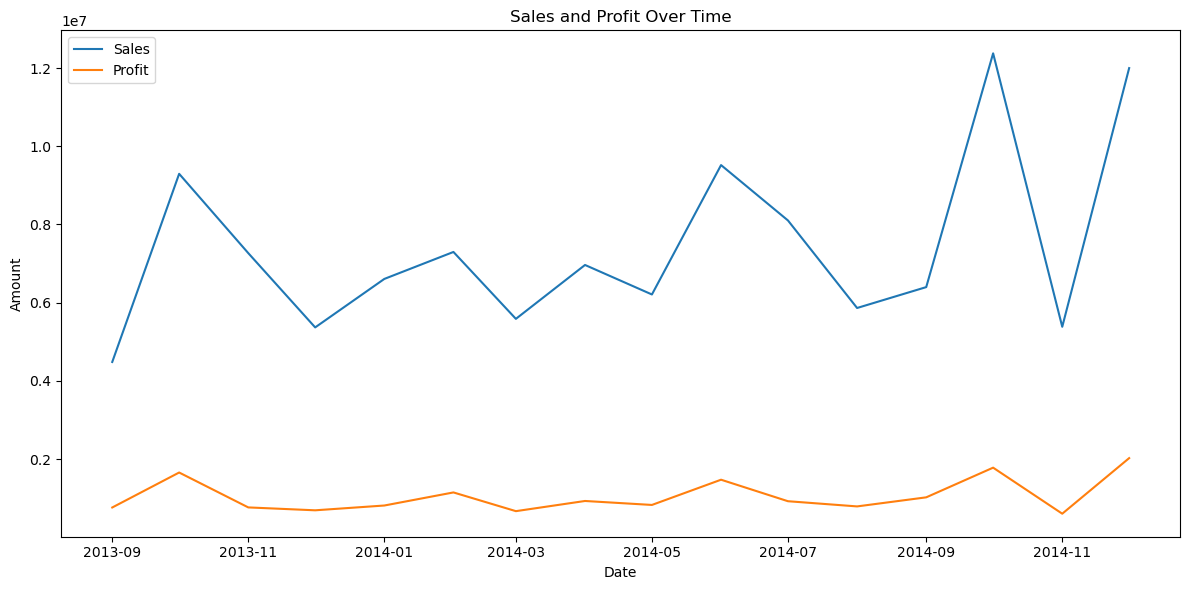

In [56]:


# Convert date column to datetime format (if not already)
gov_df['Date'] = pd.to_datetime(gov_df['Date'])

time_group = gov_df.groupby('Date')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(time_group['Date'], time_group['Sales'], label='Sales')
plt.plot(time_group['Date'], time_group['Profit'], label='Profit')
plt.title('Sales and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


.Sales show clear monthly variations, with several sharp peaks—particularly around October 2014 and December 2014, indicating significant sales spikes during those months.

.Profit also follows a fluctuating trend but remains much lower in magnitude compared to sales, suggesting:

.High operating costs or aggressive discounting may be narrowing margins.

.Potential inefficiencies in cost management or differences in profitability across product categories or countries.

.There is no steady upward or downward trend across the time period; instead, the performance is cyclical or influenced by one-time events.

.A closer analysis of these spikes could help identify promotions, procurement strategies, or external factors driving revenue during peak months.

.This visualization is essential for understanding seasonal dynamics and preparing for periods of high or low performance in future forecasting.



**Data Aggregation and Sorting:** The first part of the code takes a DataFrame (presumably named gov_df) and groups all its records by the 'Country' column. For each country, it then calculates the total 'Sales' and total 'Profit'. Finally, it sorts these aggregated results, arranging the countries from the highest total sales to the lowest. This step prepares the data in a way that makes it easy to compare sales and profit across different nations.

**Chart Generation and Display:** The second part of the code takes the prepared (aggregated and sorted) data and creates a bar chart. It sets the size of the chart, assigns a clear title ("Sales and Profit by Country"), labels the vertical axis as 'Amount', and then ensures all elements of the plot are neatly arranged before finally displaying the chart to the user.

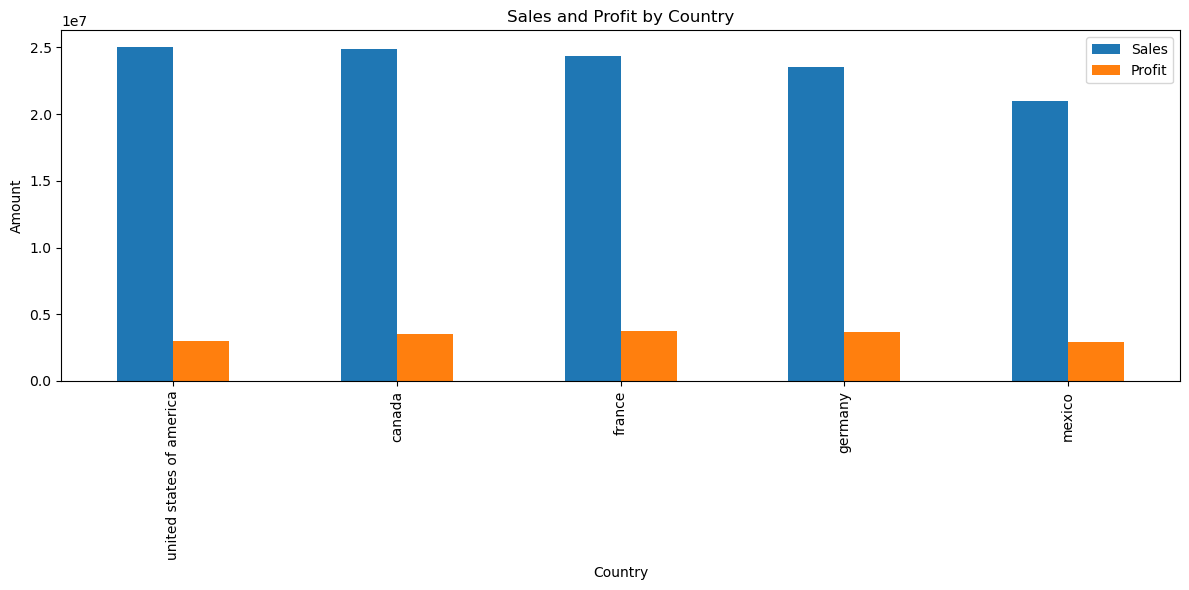

In [61]:
country_group = gov_df.groupby('Country')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

country_group.plot(kind='bar', figsize=(12, 6), title='Sales and Profit by Country')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


The bar chart, generated by the code, provides clear insights into the sales and profit performance across five different countries:

Sales Dominance: The United States of America and Canada are the clear leaders in sales, each nearing $25 million. This indicates a very strong market presence and high revenue generation in these two countries. France follows, also with significant sales.

Profitability Varies Significantly: While the top sales countries also show positive profits, the most striking insight comes from Germany, which, despite having substantial sales (ranking fourth overall), registers a negative profit. This is a critical observation, suggesting that even with high revenue, Germany is currently operating at a loss, which could be due to high operational costs, inefficient management, or aggressive pricing strategies.

Mexico's Modest Contribution: Mexico has the lowest sales among the five countries and a correspondingly lower, but positive, profit. This suggests a smaller market presence or less developed operations compared to the other nations.

Sales vs. Profit Disconnect: The chart highlights that high sales do not automatically guarantee high or even positive profits. Germany's case is a prime example of this disconnect, where strong revenue is undermined by poor profitability. This emphasizes the importance of analyzing both sales and profit figures to understand true business performance.

**Data Aggregation and Sorting:** The first part of the code takes a DataFrame (likely named gov_df), and it groups all its records based on the 'Product' column. For each unique product, it then calculates the total 'Sales' and total 'Profit'. After summing these values, it sorts the results so that products with the highest total sales appear first, followed by those with lower sales. This step effectively organizes the data to allow for easy comparison of performance across different products.

**Chart Generation and Display:** The second part of the code takes this organized product data and creates a bar chart. It sets the size of the chart for good visibility (12 inches by 6 inches), gives it a clear title ("Sales and Profit by Product"), labels the vertical axis as 'Amount' (representing sales and profit values), and then optimizes the layout to prevent any labels or titles from overlapping. Finally, it displays the generated bar chart.

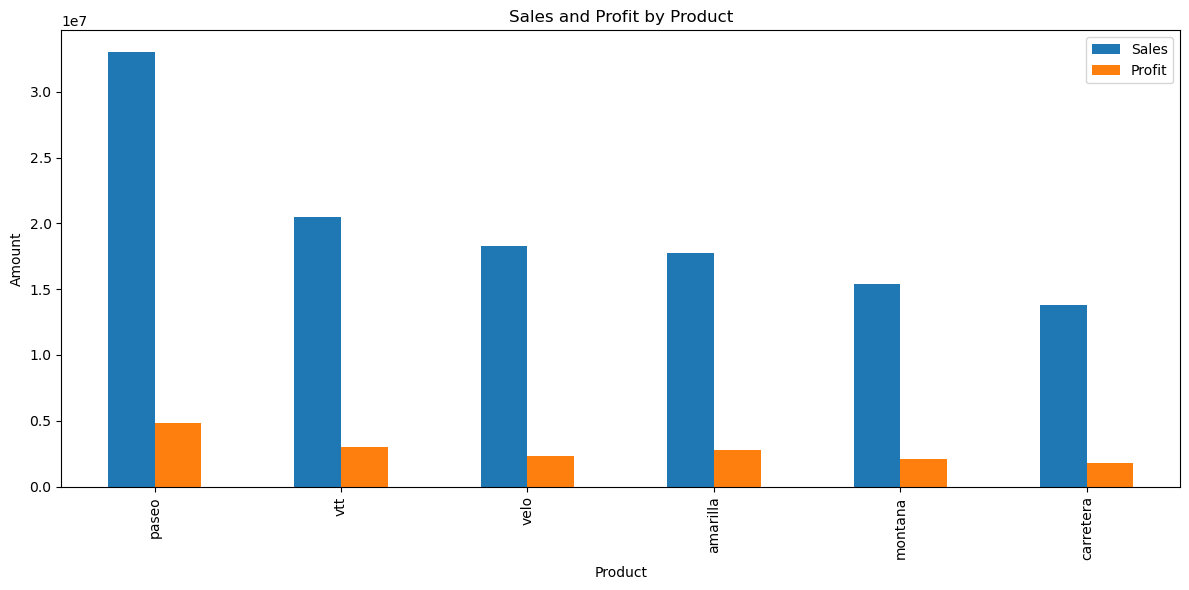

In [65]:
product_group = gov_df.groupby('Product')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

product_group.plot(kind='bar', figsize=(12, 6), title='Sales and Profit by Product')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


The bar chart "Sales and Profit by Product" provides several key insights into the performance of different products:

.Paseo is the Dominant Product: "Paseo" stands out as the top-performing product by a significant margin, generating over $30 million in sales. It also contributes the highest absolute profit, clearly being the most crucial product for revenue.

.Top 4 Products for Sales: "Paseo," "VTT," "Velo," and "Amarilla" are the leading products in terms of sales, all generating substantial revenue.

.Consistent Profit Margins: For most products, including "Paseo," "VTT," "Velo," "Amarilla," and "Montana," the profit, while considerably smaller than sales, appears to maintain a somewhat consistent positive ratio to sales. This suggests that these products are generally profitable.

.Lower Sales for Montana and Carreteria: "Montana" and "Carretera" have comparatively lower sales than the other products, with "Carretera" having the lowest sales among all shown products.

.Profitability Across Products: All the products displayed in the chart show positive profit, indicating that none of them are operating at a loss. While the profit amounts vary, they generally follow the trend of sales, meaning higher sales usually correspond to higher absolute profit.

.Potential for Optimization: While all products are profitable, the chart clearly identifies "Paseo" as the star product. Businesses might consider strategies to further leverage "Paseo's" success or analyze if the profit margins of other products like "Carretera" can be improved.````m

**Data Aggregation and Preparation:** The code first groups the data (from gov_df) by 'Product' and calculates the sum of 'COGS' and 'Profit' for each. To ensure a clear visual hierarchy in the chart, it then creates a temporary 'total' column by adding COGS and Profit for each product. This 'total' is used to sort the products from highest combined COGS and Profit to lowest, before the temporary 'total' column is dropped. This preparation ensures the most impactful products are shown first in the chart.

**Stacked Bar Chart Generation:** Finally, the code generates a stacked bar chart. This type of chart is ideal because it allows for the visualization of two components (COGS and Profit) contributing to a single total (which is implicitly Sales or Revenue). It sets the chart's size, applies a descriptive title, labels the axes, rotates the product names for readability, adds a legend to distinguish COGS from Profit, and optimizes the layout before displaying the chart.

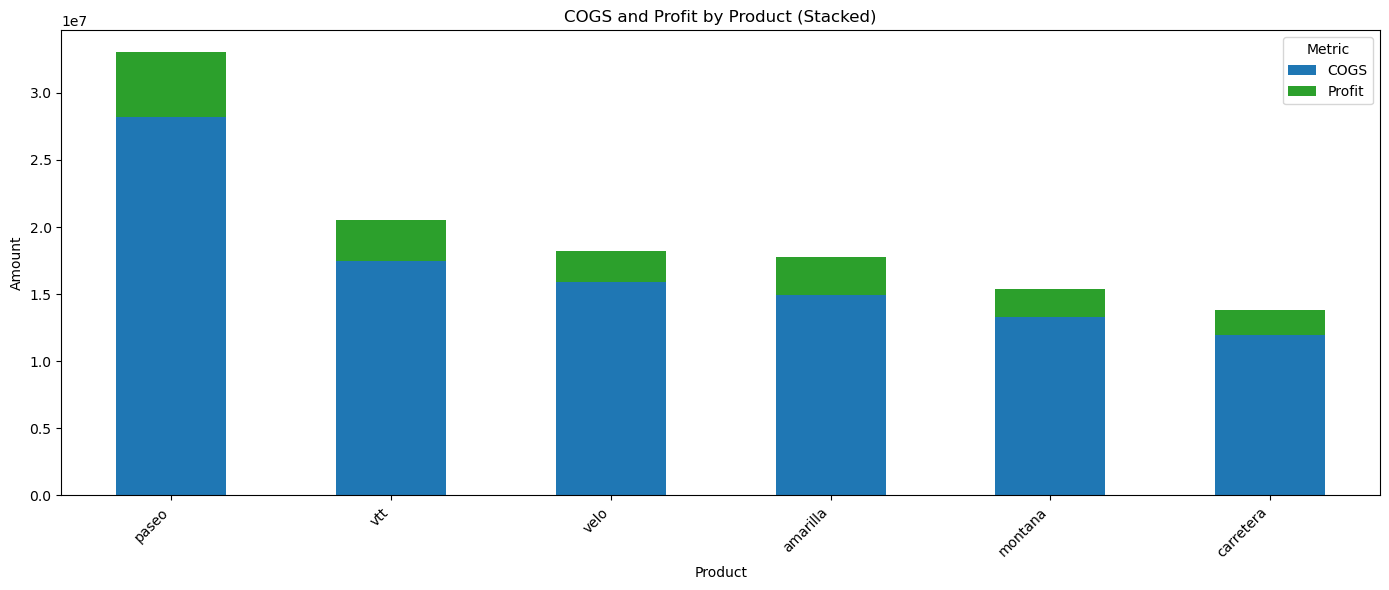

In [69]:
# Group by product and sum profit and COGS
stacked_data = gov_df.groupby('Product')[['COGS', 'Profit']].sum()

# Sort by total (COGS + profit) for better visual
stacked_data['total'] = stacked_data['COGS'] + stacked_data['Profit']
stacked_data = stacked_data.sort_values(by='total', ascending=False)
stacked_data = stacked_data.drop(columns='total')

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 6), color=['#1f77b4', '#2ca02c'])

plt.title('COGS and Profit by Product (Stacked)')
plt.xlabel('Product')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


The stacked bar chart "COGS and Profit by Product (Stacked)" offers the following key insights:

Paseo's Dominance: "Paseo" is clearly the product with the highest overall contribution (COGS + Profit), indicating it has the largest sales volume. Both its COGS (the larger blue portion) and profit (the green portion on top) are significantly higher than other products.

VTT and Velo are Strong Contributors: "VTT" and "Velo" follow "Paseo" as the next highest contributors, showing substantial COGS and healthy profit margins.

Consistent Profitability Across Products: For all products displayed, there is a visible green segment on top of the blue COGS segment, which indicates that all products are profitable. None of them show a negative profit, which is a positive sign for the business.

Relationship Between COGS and Profit: The chart visually represents the proportion of COGS and Profit for each product. While COGS (the blue part) makes up the majority of the total for all products, the consistent presence of the green 'Profit' segment on top is a healthy indicator.

Carretera's Smaller Scale: "Carretera" has the lowest total contribution (COGS + Profit), suggesting it has the lowest sales volume among the listed products. However, it still maintains a positive profit margin.

Efficiency and Cost Management: The chart implicitly shows the efficiency of each product. Products with a larger green portion relative to their total bar might be more profitable per unit of sales, even if their overall sales volume is lower. Conversely, even with high sales, a very thin green line might suggest lower profit margins. "Paseo" appears to have a good balance of high sales volume and a healthy profit margin.

**Data Aggregation:** The first part of the code takes the DataFrame (presumably gov_df) and groups all its records based on the 'Segment' column. For each unique customer segment (e.g., "government," "enterprise," "small business"), it calculates the sum of all 'Sales' associated with that segment. This step aggregates the raw sales data into segment-wise totals.

**Pie Chart Generation:** The second part of the code then takes these aggregated sales totals and generates a pie chart. A pie chart is particularly suitable here because it visually represents how each segment contributes to the total sales as a proportion. The autopct='%1.1f%%' argument formats the percentages to one decimal place directly on the chart slices, making it easy to read the exact contribution of each segment. It also sets the chart size and title, and explicitly removes the y-axis label (which is not needed for a pie chart) before displaying the plot.

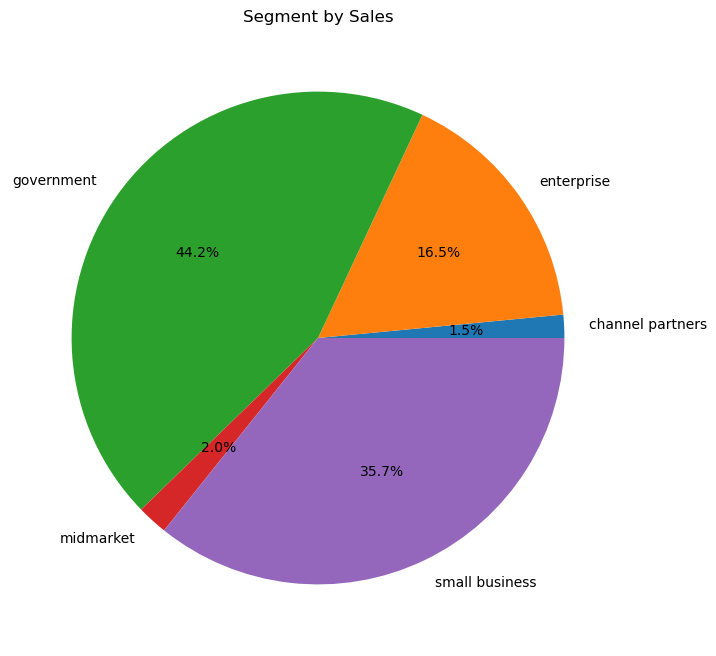

In [74]:
segment_sales = gov_df.groupby('Segment')['Sales'].sum()

segment_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Segment by Sales')
plt.ylabel('')  # Remove y-label
plt.show()


The pie chart "Segment by Sales" provides clear insights into the distribution of sales across different customer segments:

Government is the Largest Segment: The "government" segment accounts for the largest share of sales at 44.2%. This indicates that government contracts or sales to governmental entities are the primary revenue driver for the business.

Small Business is a Significant Contributor: The "small business" segment is the second largest, contributing 35.7% of the total sales. Combined with government, these two segments make up nearly 80% of the total sales.

Enterprise Plays a Notable Role: The "enterprise" segment contributes 16.5% of sales, making it the third most significant segment.

Midmarket and Channel Partners are Smaller Segments: "Midmarket" accounts for a small 2.0% of sales, and "channel partners" represent the smallest slice at 1.5%. These segments contribute very little to the overall sales revenue compared to the others.

Focus Areas for Growth: The chart clearly highlights where the sales efforts are currently concentrated and successful (government, small business, enterprise). For growth, the company might consider further investment in these dominant segments or strategically evaluate if it's worthwhile to try and grow the smaller "midmarket" and "channel partners" segments, given their current minimal contribution.

**Profit Margin Calculation and Preparation:** The first part of the code aggregates the 'Sales' and 'Profit' data from the gov_df DataFrame for each 'Country'. It then calculates the 'Profit_margin' for each country by dividing the total 'Profit' by the total 'Sales'. This is a crucial step as profit margin provides a percentage indicator of how much profit is made for every dollar of sales, offering a different perspective than just raw profit numbers. Finally, it sorts these countries by their calculated profit margin in descending order, so the most profitable countries appear first.

**Bar Chart Generation:** The second part of the code then takes these calculated and sorted profit margins and generates a bar chart. This type of chart is effective for comparing the profit margins across different countries. It sets the size of the chart, applies a clear title ("Profit Margin by Country"), labels the y-axis specifically as 'Profit Margin (Profit ÷ Sales)' to indicate what the values represent, labels the x-axis as 'Country', rotates the country names for better readability, and optimizes the plot layout before displaying it.

In [78]:
# Calculate profit margin by country
country_margin = gov_df.groupby('Country')[['Sales', 'Profit']].sum()
country_margin['Profit_margin'] = country_margin['Profit'] / country_margin['Sales']
country_margin = country_margin.sort_values(by='Profit_margin', ascending=False)

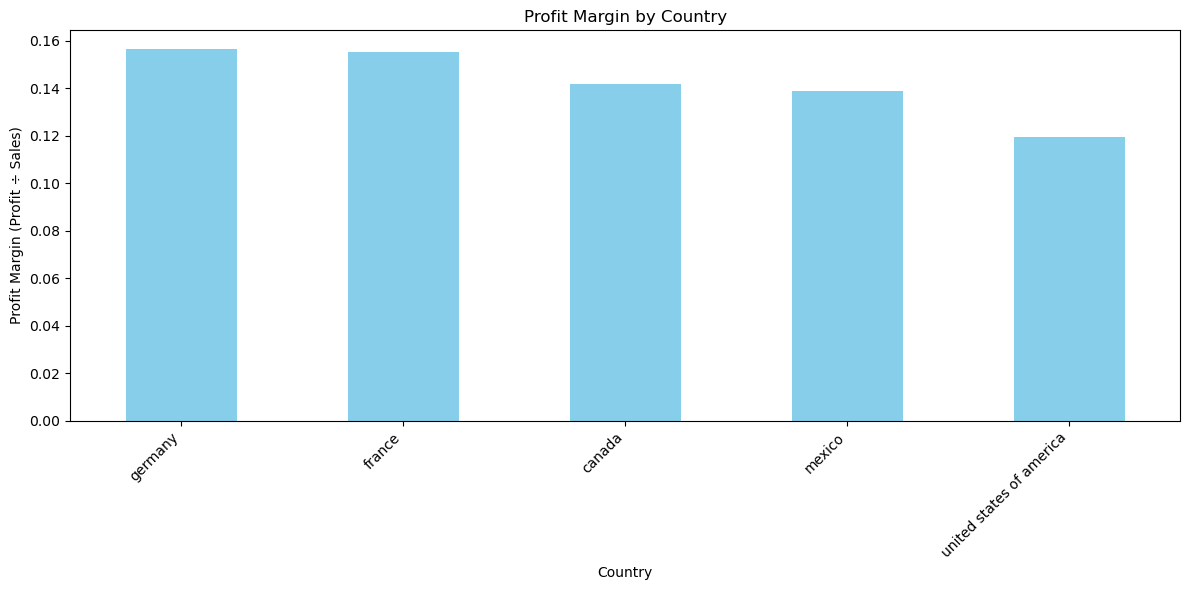

In [80]:
# Plot
plt.figure(figsize=(12, 6))
country_margin['Profit_margin'].plot(kind='bar', color='skyblue')
plt.title('Profit Margin by Country')
plt.ylabel('Profit Margin (Profit ÷ Sales)')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart "Profit Margin by Country" offers several key insights into the efficiency of operations in different countries:

Germany Leads in Profit Margin: Surprisingly, Germany has the highest profit margin among the listed countries, at approximately 15.7%. This contrasts with previous charts where Germany showed negative absolute profit. This indicates that while Germany might have lower sales volumes or specific high costs that lead to overall losses, the percentage of profit generated from each sale is relatively high. This suggests good cost control or effective pricing strategies at a per-unit level.

France and Canada Follow Closely: France and Canada have very similar and strong profit margins, just slightly below Germany's, around 15.5% and 14.2% respectively.

Mexico and United States of America Have Lower Margins: Mexico and the United States of America have the lowest profit margins among the group, around 13.8% and 12.0% respectively.

Contrasting Insights with Absolute Profit/Sales: This chart provides a crucial proportional view that might contradict conclusions drawn from absolute sales or profit figures alone. For example, while the United States might have the highest total sales (as seen in earlier charts), its profit margin is the lowest. This implies that while the volume of business is high, the efficiency of converting sales into profit is comparatively lower than in other countries.

Efficiency vs. Volume: The chart highlights the difference between sales volume and operational efficiency. Countries like Germany, despite potential issues with overall sales volume or specific high costs leading to negative absolute profit (as seen in a previous chart), demonstrate strong efficiency in converting revenue into profit. Conversely, high-volume countries like the USA might need to scrutinize their cost structures or pricing strategies to improve their profit margins.

**Average Discount Calculation and Preparation:** The first part of the code groups the data (from gov_df) by the 'Segment' column. For each customer segment, it calculates the mean (average) of the 'Discounts' given. This provides an understanding of how much discount is typically offered to each type of customer. The results are then sorted in descending order, so the segments with the highest average discounts appear first.

**Bar Chart Generation:** The second part of the code takes these calculated and sorted average discounts and generates a bar chart. A bar chart is suitable for comparing these average values across different segments. It sets the size of the plot, gives it a descriptive title ("Average Discount by Segment"), labels the y-axis as 'Average Discount', and then ensures the layout is tight before displaying the chart.

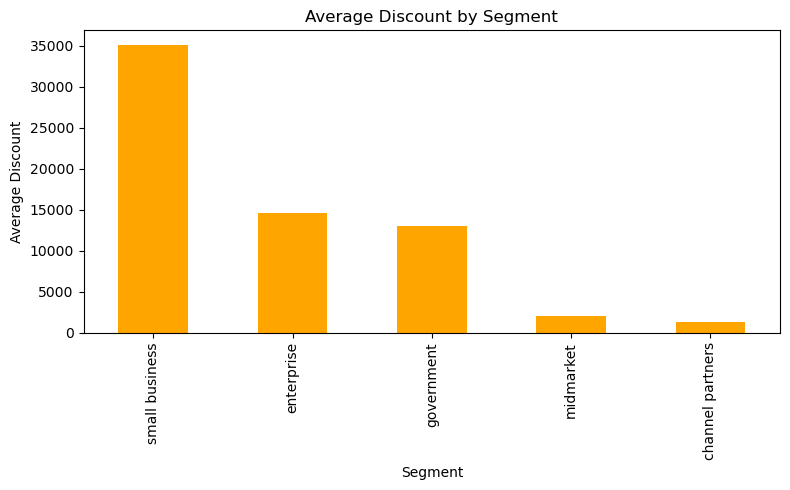

In [84]:
avg_discount = gov_df.groupby('Segment')['Discounts'].mean().sort_values(ascending=False)

avg_discount.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Discount by Segment')
plt.ylabel('Average Discount')
plt.tight_layout()
plt.show()

The bar chart "Average Discount by Segment" provides clear insights into the discounting strategies applied to different customer groups:

Small Business Receives the Highest Average Discount: The "small business" segment receives by far the highest average discount, at approximately $35,000. This is significantly higher than any other segment. This could be a deliberate strategy to attract or retain small business clients, or it might indicate larger deal sizes for this segment with associated larger discounts.

Enterprise and Government Discounts are Moderate: "Enterprise" and "government" segments receive moderate average discounts, around $14,500 and $13,000 respectively. While substantial, they are much lower than those offered to small businesses.

Midmarket and Channel Partners Receive Minimal Discounts: The "midmarket" and "channel partners" segments receive very low average discounts, with "midmarket" around $2,000 and "channel partners" even lower, under $1,000. This suggests that discounts are not a primary sales driver for these segments, or perhaps these segments involve smaller transactions where large discounts are less feasible.

Targeted Discounting Strategy: The stark differences in average discounts suggest a highly targeted discounting strategy. The company is willing to offer significant discounts to "small business" clients, possibly to secure their business in a competitive market or due to the nature of the deals.

Impact on Profitability: While not directly shown, higher average discounts (especially for "small business") could impact the overall profit margin from those segments. It would be valuable to cross-reference this with profit data by segment to understand if these high discounts are justified by increased volume or if they are eroding profitability.